## Isolate hand from background
This is a test on one image of a hand gesture and the same ROI with just the background to try to isolate as best as possible the hand.  

Background could be very noisi so I'm hoping this will help the CNN to come up with a decision.

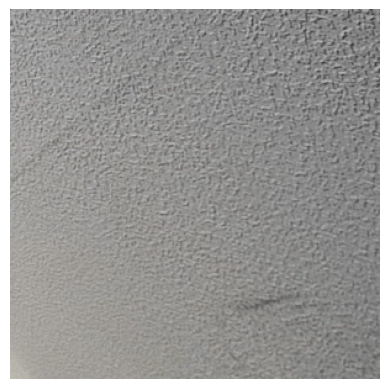

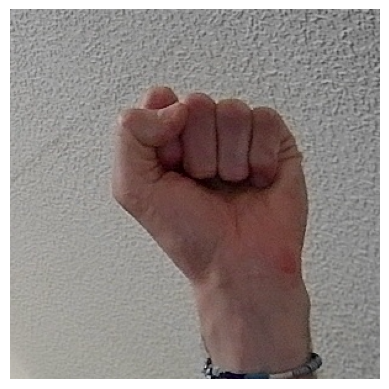

In [120]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_image(path: str) -> np.ndarray:
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def display_image(image: np.ndarray) -> None:
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

bkg_img = load_image('test/bkg.png')
rock_img = load_image('test/rock.png')
display_image(bkg_img)
display_image(rock_img)

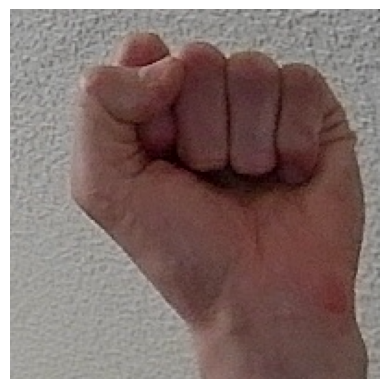

In [121]:
roi = rock_img[50:250, 50:250]
roi_bkg = bkg_img[50:250, 50:250]
display_image(roi)

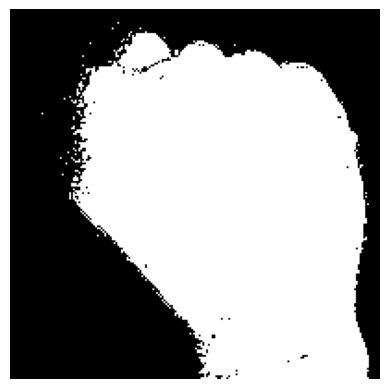

In [122]:
# create threshold mask to isolate foreground
diff = cv2.absdiff(roi, roi_bkg)
mask = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(mask, 20, 255, cv2.THRESH_BINARY)  # play with different threshold values
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
display_image(mask)

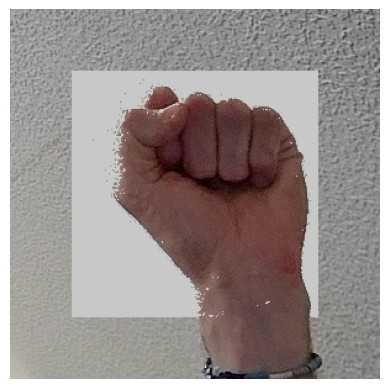

In [123]:
# apply the mask to the rock image
new_bkg = np.ones_like(roi) * 200  # create a uniformed background
# paste the rock on the background
rock_img[50:250, 50:250] = np.where(mask==255, roi, new_bkg)
display_image(rock_img)